# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [ ]:
# Write your code here
!pip install scikit-learn nltk xgboost gensim transformers pandas

In [ ]:
import nltk
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Downloading necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

# Initializing Lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Preprocessing function: Converting to lowercase, removing non-alphabetic characters, tokenizing, removing stop words, and lemmatizing
def preprocess_text(text):
    text = text.lower()  # Converting text to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Removing special characters and numbers
    tokens = nltk.word_tokenize(text)  # Tokenizing the text into words
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lemmatizing and removing stopwords
    return ' '.join(tokens)  # Joining the tokens back into a string


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
# Function to load data from a .txt file
def load_data(file_path):
    reviews = []
    sentiments = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            parts = line.strip().split(' ', 1)  # Splitting on the first space: sentiment (0 or 1) and review
            sentiments.append(int(parts[0]))  # The first part is the sentiment (0 or 1)
            reviews.append(parts[1])  # The second part is the review text
    return pd.DataFrame({'review': reviews, 'sentiment': sentiments})

# Loading the training and testing datasets
train_data = load_data('/content/stsa-train.txt')
test_data = load_data('/content/stsa-test.txt')

print(train_data[:10])

                                              review  sentiment
0  a stirring , funny and finally transporting re...          1
1  apparently reassembled from the cutting-room f...          0
2  they presume their audience wo n't sit still f...          0
3  this is a visually stunning rumination on love...          1
4  jonathan parker 's bartleby should have been t...          1
5  campanella gets the tone just right -- funny i...          1
6  a fan film that for the uninitiated plays bett...          0
7  béart and berling are both superb , while hupp...          1
8  a little less extreme than in the past , with ...          0
9                     the film is strictly routine .          0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Apply preprocessing to the training data reviews
X_train = train_data['review'].apply(preprocess_text)
y_train = train_data['sentiment']
X_test = test_data['review'].apply(preprocess_text)
y_test = test_data['sentiment']

# Split the data into training and validation sets (80-20 split)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Convert text data into numerical features using TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(X_test)


### MultinomialNB

In [ ]:
# Initialize the Multinomial Naive Bayes model
model = MultinomialNB()

# Set up 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

fold = 1
# Loop over each fold in the cross-validation
for train_index, val_index in kf.split(X_train_tfidf):
    X_train_fold, X_val_fold = X_train_tfidf[train_index], X_train_tfidf[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Train the model on the current fold
    model.fit(X_train_fold, y_train_fold)

    # Predict the labels on the validation set
    y_val_pred = model.predict(X_val_tfidf)

    # Calculate evaluation metrics: accuracy, recall, precision, and F1 score
    accuracy = accuracy_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)

    # Print the evaluation metrics for the current fold
    print(f"Fold {fold}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print("-------------------------")
    fold += 1

# Train the model on the entire training dataset after cross-validation
model.fit(X_train_tfidf, y_train)

# Evaluate the model on the validation set
y_val_pred = model.predict(X_val_tfidf)
accuracy = accuracy_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

# Print the final evaluation on the validation set
print(f"Final Evaluation on Validation Set:")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  F1 Score: {f1:.4f}")

# Evaluate the final model on the test data
y_test_pred = model.predict(X_test_tfidf)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print the final evaluation on the test set
print(f"Final Evaluation on Test Set:")
print(f"  Accuracy: {test_accuracy:.4f}")
print(f"  Recall: {test_recall:.4f}")
print(f"  Precision: {test_precision:.4f}")
print(f"  F1 Score: {test_f1:.4f}")

Fold 1:
  Accuracy: 0.7962
  Recall: 0.8612
  Precision: 0.7704
  F1 Score: 0.8132
-------------------------
Fold 2:
  Accuracy: 0.7905
  Recall: 0.8654
  Precision: 0.7608
  F1 Score: 0.8097
-------------------------
Fold 3:
  Accuracy: 0.7890
  Recall: 0.8513
  Precision: 0.7654
  F1 Score: 0.8061
-------------------------
Fold 4:
  Accuracy: 0.7876
  Recall: 0.8583
  Precision: 0.7602
  F1 Score: 0.8063
-------------------------
Fold 5:
  Accuracy: 0.7890
  Recall: 0.8471
  Precision: 0.7675
  F1 Score: 0.8053
-------------------------
Fold 6:
  Accuracy: 0.7811
  Recall: 0.8626
  Precision: 0.7500
  F1 Score: 0.8023
-------------------------
Fold 7:
  Accuracy: 0.7890
  Recall: 0.8569
  Precision: 0.7628
  F1 Score: 0.8071
-------------------------
Fold 8:
  Accuracy: 0.7890
  Recall: 0.8513
  Precision: 0.7654
  F1 Score: 0.8061
-------------------------
Fold 9:
  Accuracy: 0.7876
  Recall: 0.8640
  Precision: 0.7577
  F1 Score: 0.8073
-------------------------
Fold 10:
  Accuracy

###SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Initialize the Support Vector Machine model (SVM)
model = SVC(kernel='linear', random_state=42)  # Using linear kernel for SVM

# Set up 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

fold = 1
# Loop over each fold in the cross-validation
for train_index, val_index in kf.split(X_train_tfidf):
    X_train_fold, X_val_fold = X_train_tfidf[train_index], X_train_tfidf[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Train the model on the current fold
    model.fit(X_train_fold, y_train_fold)

    # Predict the labels on the validation set
    y_val_pred = model.predict(X_val_tfidf)

    # Calculate evaluation metrics: accuracy, recall, precision, and F1 score
    accuracy = accuracy_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)

    # Print the evaluation metrics for the current fold
    print(f"Fold {fold}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print("-------------------------")
    fold += 1

# Train the model on the entire training dataset after cross-validation
model.fit(X_train_tfidf, y_train)

# Evaluate the model on the static validation set
y_val_pred = model.predict(X_val_tfidf)
accuracy = accuracy_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

# Print the final evaluation on the validation set
print(f"Final Evaluation on Validation Set:")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  F1 Score: {f1:.4f}")

# Evaluate the final model on the test data
y_test_pred = model.predict(X_test_tfidf)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print the final evaluation on the test set
print(f"Final Evaluation on Test Set:")
print(f"  Accuracy: {test_accuracy:.4f}")
print(f"  Recall: {test_recall:.4f}")
print(f"  Precision: {test_precision:.4f}")
print(f"  F1 Score: {test_f1:.4f}")


Fold 1:
  Accuracy: 0.7919
  Recall: 0.8205
  Precision: 0.7852
  F1 Score: 0.8025
-------------------------
Fold 2:
  Accuracy: 0.7970
  Recall: 0.8471
  Precision: 0.7784
  F1 Score: 0.8113
-------------------------
Fold 3:
  Accuracy: 0.7890
  Recall: 0.8345
  Precision: 0.7737
  F1 Score: 0.8030
-------------------------
Fold 4:
  Accuracy: 0.7897
  Recall: 0.8289
  Precision: 0.7776
  F1 Score: 0.8024
-------------------------
Fold 5:
  Accuracy: 0.7876
  Recall: 0.8289
  Precision: 0.7746
  F1 Score: 0.8008
-------------------------
Fold 6:
  Accuracy: 0.7825
  Recall: 0.8247
  Precision: 0.7696
  F1 Score: 0.7962
-------------------------
Fold 7:
  Accuracy: 0.7890
  Recall: 0.8317
  Precision: 0.7752
  F1 Score: 0.8024
-------------------------
Fold 8:
  Accuracy: 0.7840
  Recall: 0.8149
  Precision: 0.7767
  F1 Score: 0.7953
-------------------------
Fold 9:
  Accuracy: 0.7854
  Recall: 0.8191
  Precision: 0.7766
  F1 Score: 0.7973
-------------------------
Fold 10:
  Accuracy

###KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Initialize the K-Nearest Neighbors model
model = KNeighborsClassifier(n_neighbors=3)  # Set n_neighbors to 3

# Set up 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

fold = 1
# Loop over each fold in the cross-validation
for train_index, val_index in kf.split(X_train_tfidf):
    X_train_fold, X_val_fold = X_train_tfidf[train_index], X_train_tfidf[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Train the model on the current fold
    model.fit(X_train_fold, y_train_fold)

    # Predict the labels on the validation set
    y_val_pred = model.predict(X_val_tfidf)

    # Calculate evaluation metrics: accuracy, recall, precision, and F1 score
    accuracy = accuracy_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)

    # Print the evaluation metrics for the current fold
    print(f"Fold {fold}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print("-------------------------")
    fold += 1

# Train the model on the entire training dataset after cross-validation
model.fit(X_train_tfidf, y_train)

# Evaluate the model on the static validation set
y_val_pred = model.predict(X_val_tfidf)
accuracy = accuracy_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

# Print the final evaluation on the validation set
print(f"Final Evaluation on Validation Set:")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  F1 Score: {f1:.4f}")

# Evaluate the final model on the test data
y_test_pred = model.predict(X_test_tfidf)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print the final evaluation on the test set
print(f"Final Evaluation on Test Set:")
print(f"  Accuracy: {test_accuracy:.4f}")
print(f"  Recall: {test_recall:.4f}")
print(f"  Precision: {test_precision:.4f}")
print(f"  F1 Score: {test_f1:.4f}")

Fold 1:
  Accuracy: 0.5506
  Recall: 0.9804
  Precision: 0.5348
  F1 Score: 0.6921
-------------------------
Fold 2:
  Accuracy: 0.5188
  Recall: 0.0982
  Precision: 0.7527
  F1 Score: 0.1737
-------------------------
Fold 3:
  Accuracy: 0.5173
  Recall: 0.0926
  Precision: 0.7586
  F1 Score: 0.1650
-------------------------
Fold 4:
  Accuracy: 0.4993
  Recall: 0.0309
  Precision: 0.9167
  F1 Score: 0.0597
-------------------------
Fold 5:
  Accuracy: 0.5152
  Recall: 0.0912
  Precision: 0.7386
  F1 Score: 0.1623
-------------------------
Fold 6:
  Accuracy: 0.5188
  Recall: 0.0968
  Precision: 0.7582
  F1 Score: 0.1716
-------------------------
Fold 7:
  Accuracy: 0.5181
  Recall: 0.0968
  Precision: 0.7500
  F1 Score: 0.1714
-------------------------
Fold 8:
  Accuracy: 0.5181
  Recall: 0.0954
  Precision: 0.7556
  F1 Score: 0.1694
-------------------------
Fold 9:
  Accuracy: 0.5159
  Recall: 0.0912
  Precision: 0.7471
  F1 Score: 0.1625
-------------------------
Fold 10:
  Accuracy

###Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Set up 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

fold = 1
# Loop over each fold in the cross-validation
for train_index, val_index in kf.split(X_train_tfidf):
    X_train_fold, X_val_fold = X_train_tfidf[train_index], X_train_tfidf[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Train the model on the current fold
    model.fit(X_train_fold, y_train_fold)

    # Predict the labels on the validation set
    y_val_pred = model.predict(X_val_tfidf)

    # Calculate evaluation metrics: accuracy, recall, precision, and F1 score
    accuracy = accuracy_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)

    # Print the evaluation metrics for the current fold
    print(f"Fold {fold}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print("-------------------------")
    fold += 1

# Train the model on the entire training dataset after cross-validation
model.fit(X_train_tfidf, y_train)

# Evaluate the model on the static validation set
y_val_pred = model.predict(X_val_tfidf)
accuracy = accuracy_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

# Print the final evaluation on the validation set
print(f"Final Evaluation on Validation Set:")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  F1 Score: {f1:.4f}")

# Evaluate the final model on the test data
y_test_pred = model.predict(X_test_tfidf)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print the final evaluation on the test set
print(f"Final Evaluation on Test Set:")
print(f"  Accuracy: {test_accuracy:.4f}")
print(f"  Recall: {test_recall:.4f}")
print(f"  Precision: {test_precision:.4f}")
print(f"  F1 Score: {test_f1:.4f}")


Fold 1:
  Accuracy: 0.6720
  Recall: 0.6648
  Precision: 0.6880
  F1 Score: 0.6762
-------------------------
Fold 2:
  Accuracy: 0.6792
  Recall: 0.6634
  Precision: 0.6987
  F1 Score: 0.6806
-------------------------
Fold 3:
  Accuracy: 0.6604
  Recall: 0.6634
  Precision: 0.6728
  F1 Score: 0.6681
-------------------------
Fold 4:
  Accuracy: 0.6915
  Recall: 0.6732
  Precision: 0.7122
  F1 Score: 0.6921
-------------------------
Fold 5:
  Accuracy: 0.6647
  Recall: 0.6620
  Precision: 0.6791
  F1 Score: 0.6705
-------------------------
Fold 6:
  Accuracy: 0.6655
  Recall: 0.6578
  Precision: 0.6817
  F1 Score: 0.6695
-------------------------
Fold 7:
  Accuracy: 0.6727
  Recall: 0.6564
  Precision: 0.6923
  F1 Score: 0.6739
-------------------------
Fold 8:
  Accuracy: 0.6669
  Recall: 0.6662
  Precision: 0.6805
  F1 Score: 0.6733
-------------------------
Fold 9:
  Accuracy: 0.6510
  Recall: 0.7335
  Precision: 0.6409
  F1 Score: 0.6841
-------------------------
Fold 10:
  Accuracy

###Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Set up 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

fold = 1
# Loop over each fold in the cross-validation
for train_index, val_index in kf.split(X_train_tfidf):
    X_train_fold, X_val_fold = X_train_tfidf[train_index], X_train_tfidf[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Train the model on the current fold
    model.fit(X_train_fold, y_train_fold)

    # Predict the labels on the validation set
    y_val_pred = model.predict(X_val_tfidf)

    # Calculate evaluation metrics: accuracy, recall, precision, and F1 score
    accuracy = accuracy_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)

    # Print the evaluation metrics for the current fold
    print(f"Fold {fold}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print("-------------------------")
    fold += 1

# Train the model on the entire training dataset after cross-validation
model.fit(X_train_tfidf, y_train)

# Evaluate the model on the static validation set
y_val_pred = model.predict(X_val_tfidf)
accuracy = accuracy_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

# Print the final evaluation on the validation set
print(f"Final Evaluation on Validation Set:")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  F1 Score: {f1:.4f}")

# Evaluate the final model on the test data
y_test_pred = model.predict(X_test_tfidf)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print the final evaluation on the test set
print(f"Final Evaluation on Test Set:")
print(f"  Accuracy: {test_accuracy:.4f}")
print(f"  Recall: {test_recall:.4f}")
print(f"  Precision: {test_precision:.4f}")
print(f"  F1 Score: {test_f1:.4f}")

Fold 1:
  Accuracy: 0.7348
  Recall: 0.7924
  Precision: 0.7207
  F1 Score: 0.7548
-------------------------
Fold 2:
  Accuracy: 0.7428
  Recall: 0.7966
  Precision: 0.7291
  F1 Score: 0.7614
-------------------------
Fold 3:
  Accuracy: 0.7327
  Recall: 0.8121
  Precision: 0.7104
  F1 Score: 0.7579
-------------------------
Fold 4:
  Accuracy: 0.7240
  Recall: 0.7518
  Precision: 0.7233
  F1 Score: 0.7373
-------------------------
Fold 5:
  Accuracy: 0.7240
  Recall: 0.7686
  Precision: 0.7163
  F1 Score: 0.7415
-------------------------
Fold 6:
  Accuracy: 0.7312
  Recall: 0.7784
  Precision: 0.7217
  F1 Score: 0.7490
-------------------------
Fold 7:
  Accuracy: 0.7421
  Recall: 0.7630
  Precision: 0.7432
  F1 Score: 0.7529
-------------------------
Fold 8:
  Accuracy: 0.7500
  Recall: 0.7854
  Precision: 0.7437
  F1 Score: 0.7640
-------------------------
Fold 9:
  Accuracy: 0.7435
  Recall: 0.8149
  Precision: 0.7226
  F1 Score: 0.7660
-------------------------
Fold 10:
  Accuracy

###XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import KFold

# Convert sparse matrices to DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_tfidf, label=y_train)
dval = xgb.DMatrix(X_val_tfidf, label=y_val)
dtest = xgb.DMatrix(X_test_tfidf, label=y_test)

# XGBoost parameters
params = {
    'objective': 'binary:logistic',  # Binary classification
    'eval_metric': 'logloss',        # Log loss for evaluation
    'max_depth': 5,                  # Maximum depth of trees
    'learning_rate': 0.05,           # Step size shrinkage
    'subsample': 0.8,                # Fraction of samples for each tree
    'colsample_bytree': 0.8,         # Fraction of features for each tree
    'min_child_weight': 1,           # Minimum sum of instance weight needed in a child
    'gamma': 0.1,                    # Minimum loss reduction to make a split
    'scale_pos_weight': 1,           # For balanced classes
    'random_state': 42
}

# Set up 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

fold = 1
# Loop over each fold in the cross-validation
for train_index, val_index in kf.split(X_train_tfidf):
    X_train_fold, X_val_fold = X_train_tfidf[train_index], X_train_tfidf[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Convert to DMatrix format
    dtrain_fold = xgb.DMatrix(X_train_fold, label=y_train_fold)

    # Train the XGBoost model
    model = xgb.train(params, dtrain_fold, num_boost_round=200, evals=[(dval, 'eval')], early_stopping_rounds=10)

    # Predict on the validation set
    y_val_pred = model.predict(dval)
    y_val_pred = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

    # Calculate evaluation metrics: accuracy, recall, precision, and F1 score
    accuracy = accuracy_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)

    # Print the evaluation metrics for the current fold
    print(f"Fold {fold}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print("-------------------------")
    fold += 1

# Train the model on the entire training dataset after cross-validation
model = xgb.train(params, dtrain, num_boost_round=200)

# Evaluate the model on the validation set
y_val_pred = model.predict(dval)
y_val_pred = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

accuracy = accuracy_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

# Print the final evaluation on the validation set
print(f"Final Evaluation on Validation Set:")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  F1 Score: {f1:.4f}")

# Evaluate the final model on the test data
y_test_pred = model.predict(dtest)
y_test_pred = (y_test_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print the final evaluation on the test set
print(f"Final Evaluation on Test Set:")
print(f"  Accuracy: {test_accuracy:.4f}")
print(f"  Recall: {test_recall:.4f}")
print(f"  Precision: {test_precision:.4f}")
print(f"  F1 Score: {test_f1:.4f}")


[0]	eval-logloss:0.69056
[1]	eval-logloss:0.68929
[2]	eval-logloss:0.68798
[3]	eval-logloss:0.68610
[4]	eval-logloss:0.68431
[5]	eval-logloss:0.68251
[6]	eval-logloss:0.68169
[7]	eval-logloss:0.68086
[8]	eval-logloss:0.67940
[9]	eval-logloss:0.67858
[10]	eval-logloss:0.67733
[11]	eval-logloss:0.67600
[12]	eval-logloss:0.67501
[13]	eval-logloss:0.67387
[14]	eval-logloss:0.67312
[15]	eval-logloss:0.67200
[16]	eval-logloss:0.67094
[17]	eval-logloss:0.67009
[18]	eval-logloss:0.66933
[19]	eval-logloss:0.66853
[20]	eval-logloss:0.66754
[21]	eval-logloss:0.66662
[22]	eval-logloss:0.66557
[23]	eval-logloss:0.66465
[24]	eval-logloss:0.66393
[25]	eval-logloss:0.66332
[26]	eval-logloss:0.66264
[27]	eval-logloss:0.66223
[28]	eval-logloss:0.66164
[29]	eval-logloss:0.66088
[30]	eval-logloss:0.66041
[31]	eval-logloss:0.65986
[32]	eval-logloss:0.65920
[33]	eval-logloss:0.65860
[34]	eval-logloss:0.65827
[35]	eval-logloss:0.65823
[36]	eval-logloss:0.65729
[37]	eval-logloss:0.65664
[38]	eval-logloss:0.65

### Word2Vec

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors


word2vec_model = Word2Vec(sentences=train_data['review'].apply(preprocess_text).str.split(), vector_size=300, window=5, min_count=2, workers=4)

# Helper function to calculate average word embeddings
def get_average_word2vec(sentence, model, vector_size):
    words = sentence.split()  # Tokenize sentence
    valid_vectors = [model.wv[word] for word in words if word in model.wv]
    if valid_vectors:
        return np.mean(valid_vectors, axis=0)
    else:
        return np.zeros(vector_size)

# Convert reviews to averaged word embeddings
vector_size = word2vec_model.vector_size
X_train_embedded = X_train.apply(preprocess_text).apply(lambda x: get_average_word2vec(x, word2vec_model, vector_size))
X_val_embedded = X_val.apply(preprocess_text).apply(lambda x: get_average_word2vec(x, word2vec_model, vector_size))
X_test_embedded = X_test.apply(preprocess_text).apply(lambda x: get_average_word2vec(x, word2vec_model, vector_size))

# Convert to NumPy arrays for model input
X_train_embedded = np.stack(X_train_embedded.to_numpy())
X_val_embedded = np.stack(X_val_embedded.to_numpy())
X_test_embedded = np.stack(X_test_embedded.to_numpy())


# Initialize the classifier (using Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Set up 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

fold = 1
# Loop over each fold in the cross-validation
for train_index, val_index in kf.split(X_train_embedded):
    X_train_fold, X_val_fold = X_train_embedded[train_index], X_train_embedded[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Train the model on the current fold
    model.fit(X_train_fold, y_train_fold)

    # Predict on the validation set
    y_val_pred = model.predict(X_val_embedded)

    # Calculate evaluation metrics: accuracy, recall, precision, and F1 score
    accuracy = accuracy_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)

    # Print the evaluation metrics for the current fold
    print(f"Fold {fold}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print("-------------------------")
    fold += 1

# Train the model on the entire training dataset after cross-validation
model.fit(X_train_embedded, y_train)

# Evaluate the model on the validation set
y_val_pred = model.predict(X_val_embedded)

accuracy = accuracy_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

# Print the final evaluation on the validation set
print(f"Final Evaluation on Validation Set:")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  F1 Score: {f1:.4f}")

# Evaluate the final model on the test data
y_test_pred = model.predict(X_test_embedded)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print the final evaluation on the test set
print(f"Final Evaluation on Test Set:")
print(f"  Accuracy: {test_accuracy:.4f}")
print(f"  Recall: {test_recall:.4f}")
print(f"  Precision: {test_precision:.4f}")
print(f"  F1 Score: {test_f1:.4f}")


Fold 1:
  Accuracy: 0.5506
  Recall: 0.6494
  Precision: 0.5545
  F1 Score: 0.5982
-------------------------
Fold 2:
  Accuracy: 0.5397
  Recall: 0.6452
  Precision: 0.5450
  F1 Score: 0.5909
-------------------------
Fold 3:
  Accuracy: 0.5470
  Recall: 0.6536
  Precision: 0.5508
  F1 Score: 0.5978
-------------------------
Fold 4:
  Accuracy: 0.5600
  Recall: 0.6620
  Precision: 0.5619
  F1 Score: 0.6079
-------------------------
Fold 5:
  Accuracy: 0.5419
  Recall: 0.6466
  Precision: 0.5469
  F1 Score: 0.5925
-------------------------
Fold 6:
  Accuracy: 0.5592
  Recall: 0.6774
  Precision: 0.5597
  F1 Score: 0.6129
-------------------------
Fold 7:
  Accuracy: 0.5448
  Recall: 0.6494
  Precision: 0.5492
  F1 Score: 0.5951
-------------------------
Fold 8:
  Accuracy: 0.5390
  Recall: 0.6466
  Precision: 0.5443
  F1 Score: 0.5910
-------------------------
Fold 9:
  Accuracy: 0.5658
  Recall: 0.6999
  Precision: 0.5632
  F1 Score: 0.6241
-------------------------
Fold 10:
  Accuracy

### BERT Classifier

In [ ]:
import torch
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, Dataset
from torch.nn.utils.rnn import pad_sequence
from transformers import get_scheduler
from tqdm import tqdm

# Check for GPU availability
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f"Using device: {device}")

# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Define a custom dataset class
class ReviewDataset(Dataset):
    def __init__(self, reviews, labels, tokenizer, max_len=128):
        self.reviews = reviews
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.reviews)

    def __getitem__(self, index):
        review = str(self.reviews.iloc[index])
        label = self.labels.iloc[index]

        # Tokenize the review
        encoded = self.tokenizer(
            review,
            truncation=True,
            padding="max_length",
            max_length=self.max_len,
            return_tensors="pt",
        )
        return {
            "input_ids": encoded["input_ids"].squeeze(0),
            "attention_mask": encoded["attention_mask"].squeeze(0),
            "label": torch.tensor(label, dtype=torch.long),
        }

# Prepare datasets and data loaders
train_dataset = ReviewDataset(X_train, y_train, tokenizer)
val_dataset = ReviewDataset(X_val, y_val, tokenizer)
test_dataset = ReviewDataset(X_test, y_test, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Loading pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
model.to(device)

# Defining optimizer and learning rate scheduler
optimizer = AdamW(model.parameters(), lr=2e-5)
num_training_steps = len(train_loader) * 3  # 3 epochs
lr_scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)

# Training loop
def train_epoch(model, data_loader, optimizer, device, scheduler=None):
    model.train()
    total_loss = 0

    for batch in tqdm(data_loader, desc="Training"):
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        # Backpropagation
        loss.backward()
        optimizer.step()
        if scheduler:
            scheduler.step()
        optimizer.zero_grad()

    return total_loss / len(data_loader)

# Evaluation loop
def evaluate_epoch(model, data_loader, device):
    model.eval()
    predictions, true_labels = [], []

    with torch.no_grad():
        for batch in tqdm(data_loader, desc="Evaluating"):
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["label"].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=-1)

            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    return predictions, true_labels

# Training and validation loop
for epoch in range(3):  # Train for 3 epochs
    print(f"Epoch {epoch + 1}/{3}")
    train_loss = train_epoch(model, train_loader, optimizer, device, scheduler=lr_scheduler)
    print(f"Training Loss: {train_loss:.4f}")

    val_preds, val_labels = evaluate_epoch(model, val_loader, device)
    val_accuracy = accuracy_score(val_labels, val_preds)
    val_recall = recall_score(val_labels, val_preds)
    val_precision = precision_score(val_labels, val_preds)
    val_f1 = f1_score(val_labels, val_preds)

    print(f"Validation Accuracy: {val_accuracy:.4f}")
    print(f"Validation Recall: {val_recall:.4f}")
    print(f"Validation Precision: {val_precision:.4f}")
    print(f"Validation F1 Score: {val_f1:.4f}")

# Final evaluation on test set
test_preds, test_labels = evaluate_epoch(model, test_loader, device)
test_accuracy = accuracy_score(test_labels, test_preds)
test_recall = recall_score(test_labels, test_preds)
test_precision = precision_score(test_labels, test_preds)
test_f1 = f1_score(test_labels, test_preds)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")


Using device: cuda


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/3


Training: 100%|██████████| 346/346 [01:49<00:00,  3.15it/s]


Training Loss: 0.4923


Evaluating: 100%|██████████| 87/87 [00:10<00:00,  8.32it/s]


Validation Accuracy: 0.8360
Validation Recall: 0.8682
Validation Precision: 0.8231
Validation F1 Score: 0.8451
Epoch 2/3


Training: 100%|██████████| 346/346 [01:54<00:00,  3.03it/s]


Training Loss: 0.2797


Evaluating: 100%|██████████| 87/87 [00:10<00:00,  8.54it/s]


Validation Accuracy: 0.8302
Validation Recall: 0.8934
Validation Precision: 0.8003
Validation F1 Score: 0.8443
Epoch 3/3


Training: 100%|██████████| 346/346 [01:54<00:00,  3.02it/s]


Training Loss: 0.1537


Evaluating: 100%|██████████| 87/87 [00:10<00:00,  8.61it/s]


Validation Accuracy: 0.8432
Validation Recall: 0.8780
Validation Precision: 0.8280
Validation F1 Score: 0.8523


Evaluating: 100%|██████████| 114/114 [00:13<00:00,  8.53it/s]

Test Accuracy: 0.8446
Test Recall: 0.8867
Test Precision: 0.8174
Test F1 Score: 0.8507


## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [ ]:
# Write your code here
# Load dataset
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
!pip install kneed
from kneed import KneeLocator

data = pd.read_csv('/content/Amazon_Unlocked_Mobile.csv')
data.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [ ]:
data = data.dropna(subset=['Reviews']).sample(n=20000, random_state=42) # Considering 20K datapoints for clustering
texts = data['Reviews'].apply(preprocess_text) # Preprocess the text data


# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(texts)

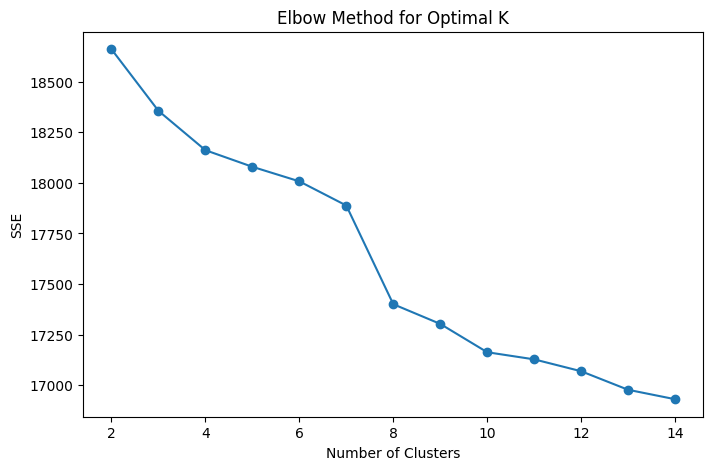

Optimal number of clusters: 4


In [ ]:
# Determine Optimal K using the Elbow Method
sse = []
k_range = range(2, 15)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot SSE to find the Elbow Point
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

# Use KneeLocator to find the optimal k
kneedle = KneeLocator(k_range, sse, curve="convex", direction="decreasing")
optimal_k = kneedle.knee
print(f"Optimal number of clusters: {optimal_k}")

In [ ]:
# Apply K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(X)

# Add cluster labels to the dataset
data['Cluster'] = labels

# Evaluate Clustering
sil_score = silhouette_score(X, labels)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.028504937096087462


In [ ]:
# Extract top keywords for each cluster
def get_top_keywords_per_cluster(kmeans_model, vectorizer, n_keywords=10):
    terms = vectorizer.get_feature_names_out()
    top_keywords = {}
    for cluster_num in range(kmeans_model.n_clusters):
        cluster_center = kmeans_model.cluster_centers_[cluster_num]
        top_indices = cluster_center.argsort()[-n_keywords:][::-1]
        top_keywords[cluster_num] = [terms[index] for index in top_indices]
    return top_keywords

top_keywords = get_top_keywords_per_cluster(kmeans, vectorizer, n_keywords=10)
print("\nTop Keywords for Each Cluster:")
for cluster, keywords in top_keywords.items():
    print(f"Cluster {cluster}: {', '.join(keywords)}")

# Print two sample reviews from each cluster
print("\nSample Reviews for Each Cluster:")
for cluster in range(optimal_k):
    print(f"\nCluster {cluster}:")
    cluster_reviews = data[data['Cluster'] == cluster]['Reviews']
    sample_reviews = cluster_reviews.sample(3, random_state=42)
    for review in sample_reviews:
        print(f"- {review}")


Top Keywords for Each Cluster:
Cluster 0: great, phone, work, price, product, love, condition, buy, problem, good
Cluster 1: good, phone, product, price, far, work, quality, really, excellent, thanks
Cluster 2: phone, great, work, love, good, use, battery, like, screen, new
Cluster 3: excellent, love, excelente, product, work, perfect, ok, good, excelent, nice

Sample Reviews for Each Cluster:

Cluster 0:
- Phone works great! Excellent condition.
- phone works great now!
- Great phone for the price.. Bought for my daughter. Works...

Cluster 1:
- Very good
- Good
- It works very good and was in good condition . I will order again if I need any more items for my phone.

Cluster 2:
- DO NOT buy if using on Verizon network. IMIE numbers are not properly loaded. The bar codes needed to activate on Verizon system are covered up and blacked out. Do yourself a favor and purchase this phone from the Google store and pay a few bucks more!
- I bought this phone..and received it a week ago. I wa

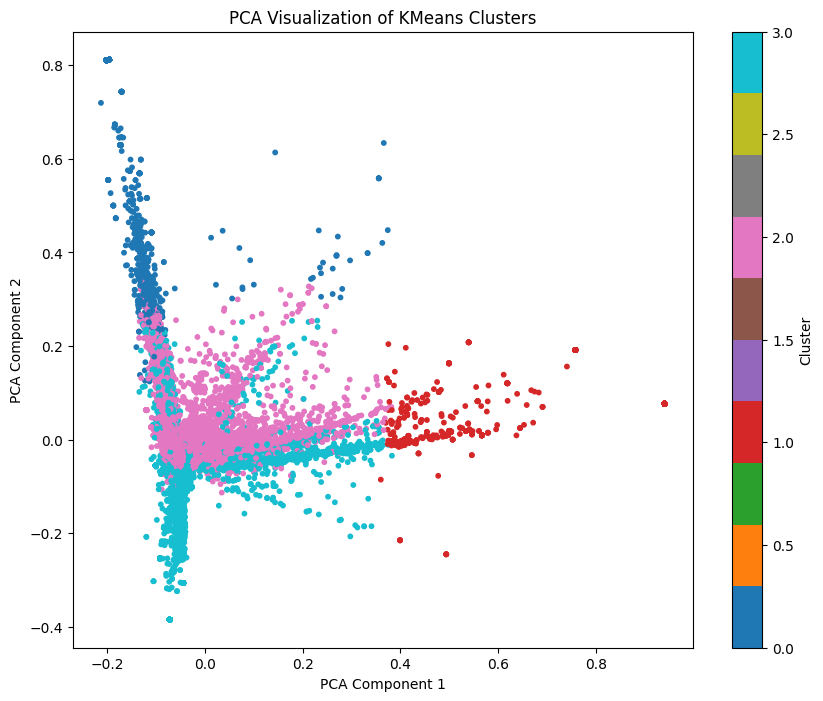

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA for visualization
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

# Plot the clusters in 2D
plt.figure(figsize=(10, 8))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='tab10', s=10)
plt.title("PCA Visualization of KMeans Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()


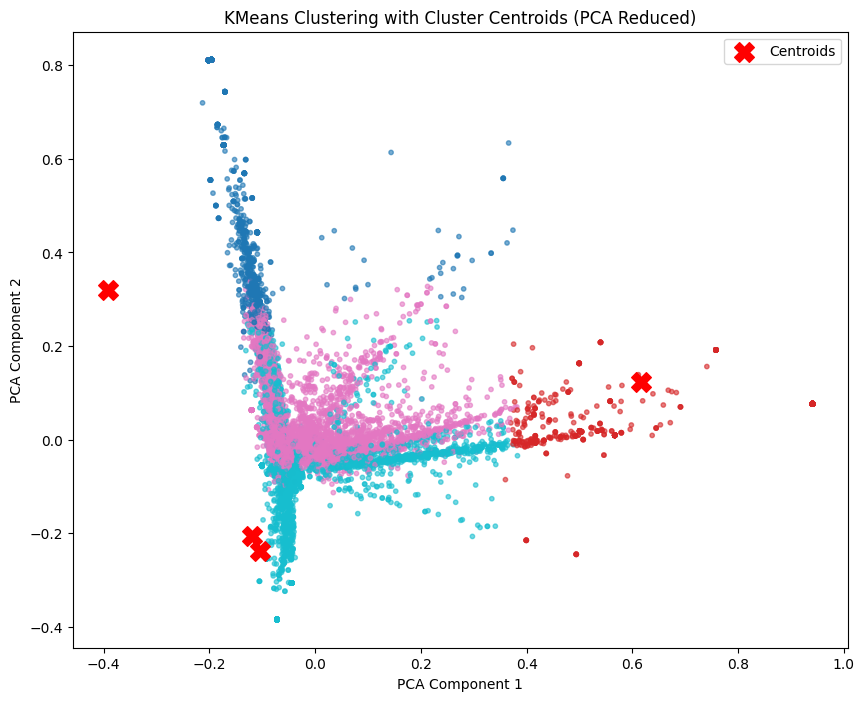

In [ ]:
# Reduce cluster centers to 2D using PCA
cluster_centers_2d = PCA(n_components=2).fit_transform(kmeans.cluster_centers_)

# Plot cluster centers
plt.figure(figsize=(10, 8))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='tab10', s=10, alpha=0.6)
plt.scatter(cluster_centers_2d[:, 0], cluster_centers_2d[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title("KMeans Clustering with Cluster Centroids (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()


### DBSCAN

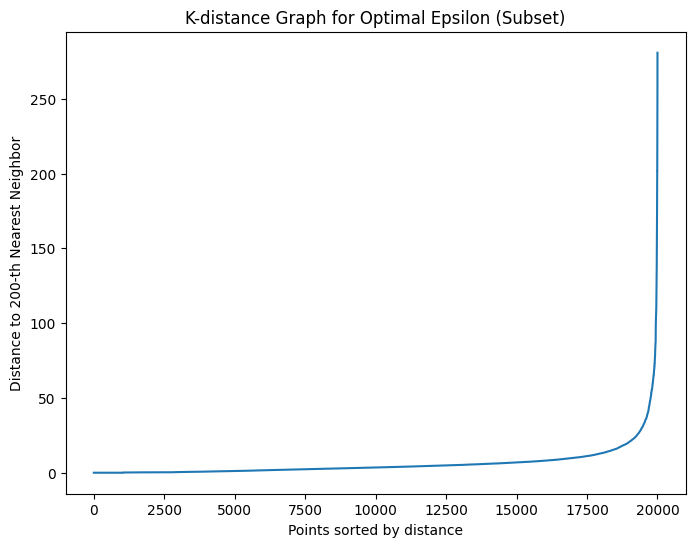

In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

X = vectorizer.fit_transform(texts[:20000]).toarray() # Restrict to 20K datapoints

sample_size = 1
sample_indices = np.random.choice(len(X), size=int(len(X) * sample_size), replace=False)
X_sample = X[sample_indices]

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sample)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=50)
X_reduced = pca.fit_transform(X_scaled)

# DBSCAN parameters
minPts = 200

# Compute k-nearest neighbors distances for the PCA-reduced and scaled data
neigh = NearestNeighbors(n_neighbors=minPts)
neigh.fit(X_reduced)  # Use reduced data after PCA
distances, indices = neigh.kneighbors(X_reduced)

# Sort the distances
distances = np.sort(distances[:, -1], axis=0)

# Plot the k-distance graph
plt.figure(figsize=(8, 6))
plt.plot(np.arange(len(distances)), distances)
plt.title('K-distance Graph for Optimal Epsilon (Subset)')
plt.xlabel('Points sorted by distance')
plt.ylabel(f'Distance to {minPts}-th Nearest Neighbor')
plt.show()

In [ ]:
optimal_eps = np.percentile(distances, 90)

print(f"Optimal epislon:{optimal_eps}")
# Apply DBSCAN with optimal eps
dbscan = DBSCAN(eps=optimal_eps, min_samples=200, metric='cosine')
labels = dbscan.fit_predict(X_reduced)

# Evaluate clustering
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Exclude noise
n_noise = list(labels).count(-1)
print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")

# Extract top keywords for each cluster
def get_top_keywords_per_cluster_dbscan(labels, vectorizer, X, n_keywords=10):
    terms = vectorizer.get_feature_names_out()
    clusters = {}
    for cluster_num in set(labels):
        if cluster_num == -1:  # Skip noise
            continue
        cluster_indices = np.where(labels == cluster_num)[0]
        cluster_mean = X[cluster_indices].mean(axis=0)
        top_indices = np.asarray(cluster_mean).argsort()[-n_keywords:][::-1]
        clusters[cluster_num] = [terms[index] for index in top_indices]
    return clusters

top_keywords = get_top_keywords_per_cluster_dbscan(labels, vectorizer, X)
print("\nTop Keywords for Each Cluster:")
for cluster, keywords in top_keywords.items():
    print(f"Cluster {cluster}: {', '.join(keywords)}")

# Print sample reviews for each cluster
print("\nSample Reviews for Each Cluster:")
for cluster in set(labels):
    if cluster == -1:  # Skip noise
        continue
    print(f"\nCluster {cluster}:")
    cluster_reviews = data[data['Cluster'] == cluster]['Reviews']
    sample_reviews = cluster_reviews.sample(2, random_state=42)
    for review in sample_reviews:
        print(f"- {review}")

Optimal epislon:13.006363766849406
Estimated number of clusters: 1
Estimated number of noise points: 0

Top Keywords for Each Cluster:
Cluster 0: phone, good, great, work, love, excellent, product, like, nice, perfect

Sample Reviews for Each Cluster:

Cluster 0:
- Phone works great! Excellent condition.
- phone works great now!


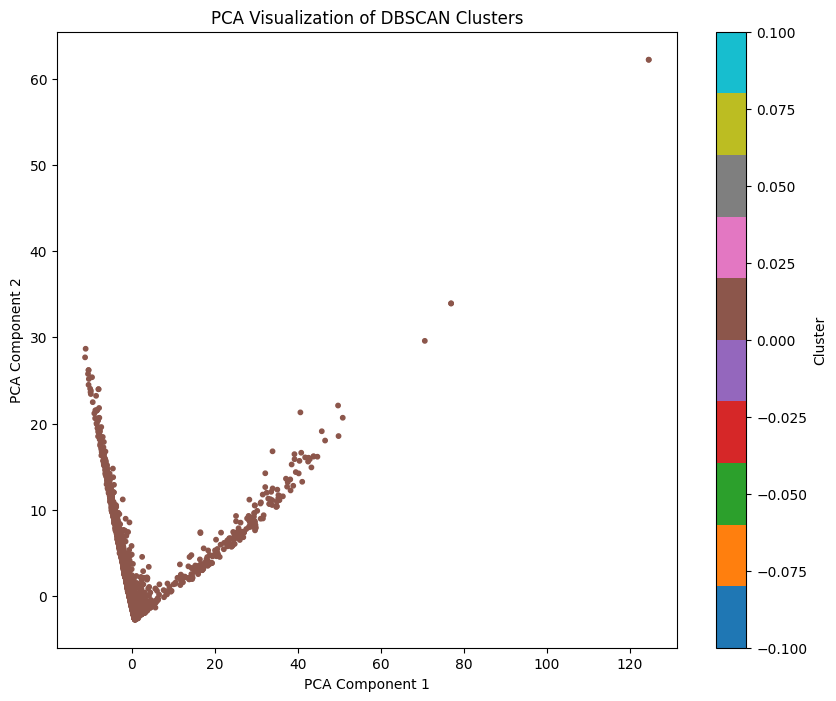

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA for visualization
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_reduced)

# Plot the clusters in 2D
plt.figure(figsize=(10, 8))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='tab10', s=10)
plt.title("PCA Visualization of DBSCAN Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

### Hierarchial clustering

<ipython-input-23-9f0e19495bd3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sample['Cluster'] = labels


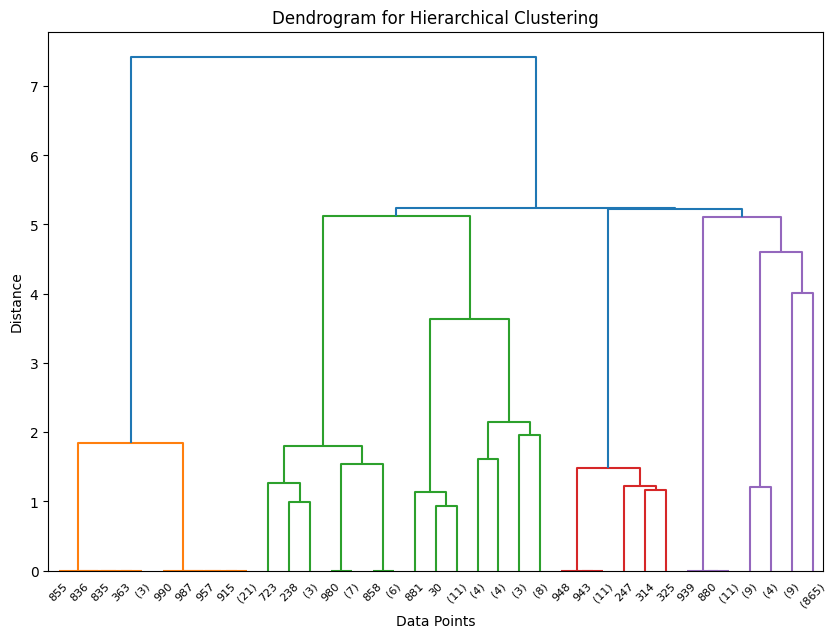

Silhouette Score for Hierarchical Clustering: 0.0278

Top Keywords for Each Cluster:
Cluster 0: phone, work, love, great, good, like, ok, nice, battery, perfect
Cluster 1: good, phone, frankly, fraud, freak, freaking, free, freedom, freeze, freezing
Cluster 2: excellent, product, good, recommended, great, described, recommend, phone, teen, condition
Cluster 3: excelente, puntos, celular, gracias, france, frankly, fraud, freak, freaking, free
Cluster 4: great, phone, price, product, cup, exactly, expected, thats, apple, need

Sample Reviews for Each Cluster:

Cluster 0:
- The S5 was all I expected and more having come from a Motorola Bravo.
- At this point, I have nothing to complain about. Granted, I've only had it for a month, but I love everything about it. It's fast, has plenty of memory for me, and it was really well priced.

Cluster 1:
- very good.
- good

Cluster 2:
- Good product, does everything I need done.
- Excellent! I recommend this product.

Cluster 3:
- Excelente
- Excel

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Sample a subset of the data
data_sample = data[:1000]
X_sample = X[:1000]

agg_clust = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
labels = agg_clust.fit_predict(X_sample)
data_sample['Cluster'] = labels

# Plot the Dendrogram to visualize the clustering process
linked = linkage(X_sample, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Evaluate clustering with silhouette score on the sampled data
sil_score = silhouette_score(X_sample, labels)
print(f'Silhouette Score for Hierarchical Clustering: {sil_score:.4f}')

# Extract top keywords for each cluster
def get_top_keywords_per_cluster(labels, vectorizer, X, n_keywords=10):
    terms = vectorizer.get_feature_names_out()
    clusters = {}
    for cluster_num in np.unique(labels):
        cluster_indices = np.where(labels == cluster_num)[0]
        cluster_mean = X[cluster_indices].mean(axis=0)
        top_indices = np.asarray(cluster_mean).argsort()[-n_keywords:][::-1]
        clusters[cluster_num] = [terms[index] for index in top_indices]
    return clusters

top_keywords = get_top_keywords_per_cluster(labels, vectorizer, X_sample, n_keywords=10)
print("\nTop Keywords for Each Cluster:")
for cluster, keywords in top_keywords.items():
    print(f"Cluster {cluster}: {', '.join(keywords)}")

# Print sample reviews for each cluster
print("\nSample Reviews for Each Cluster:")
for cluster in np.unique(labels):
    print(f"\nCluster {cluster}:")
    cluster_reviews = data_sample[data_sample['Cluster'] == cluster]['Reviews']
    if len(cluster_reviews) < 2:  # Handle small clusters
        print("- Not enough reviews to sample.")
    else:
        sample_reviews = cluster_reviews.sample(2, random_state=42)  # Sample 2 reviews per cluster
        for review in sample_reviews:
            print(f"- {review}")


### Word2Vec


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from gensim.models import Word2Vec
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sentences = data['Reviews'].apply(lambda x: x.split())
word2vec_model = Word2Vec(sentences, vector_size=300, window=5, min_count=2, workers=4)

# Generate sentence embeddings by averaging Word2Vec vectors
def get_average_word2vec(sentence, model, vector_size):
    words = sentence.split()  # Tokenize sentence
    valid_vectors = [model.wv[word] for word in words if word in model.wv]
    if valid_vectors:
        return np.mean(valid_vectors, axis=0)
    else:
        return np.zeros(vector_size)

# Compute embeddings for all reviews
vector_size = word2vec_model.vector_size
X_embeddings = np.array([get_average_word2vec(text, word2vec_model, vector_size) for text in data['Reviews']])

# Apply KMeans clustering
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(X_embeddings)

# Add cluster labels to the dataset
data['Cluster'] = labels

# Evaluate clustering
sil_score = silhouette_score(X_embeddings, labels)
print(f"Silhouette Score for KMeans Clustering: {sil_score:.4f}")

# Extract top keywords for each cluster
def get_top_keywords_per_cluster(kmeans_model, word2vec_model, n_keywords=10):
    clusters = {}
    for cluster_num in range(kmeans_model.n_clusters):
        cluster_indices = np.where(kmeans_model.labels_ == cluster_num)[0]
        cluster_embeddings = X_embeddings[cluster_indices]
        cluster_mean = cluster_embeddings.mean(axis=0)  # Compute mean embedding for the cluster
        # Find top n_keywords closest to the mean embedding
        closest_words = word2vec_model.wv.similar_by_vector(cluster_mean, topn=n_keywords)
        clusters[cluster_num] = [word for word, _ in closest_words]
    return clusters

top_keywords = get_top_keywords_per_cluster(kmeans, word2vec_model, n_keywords=10)
print("\nTop Keywords for Each Cluster:")
for cluster, keywords in top_keywords.items():
    print(f"Cluster {cluster}: {', '.join(keywords)}")

# Print sample reviews for each cluster
print("\nSample Reviews for Each Cluster:")
for cluster in range(optimal_k):
    print(f"\nCluster {cluster}:")
    cluster_reviews = data[data['Cluster'] == cluster]['Reviews']
    if len(cluster_reviews) < 3:  # Handle clusters with fewer than 3 reviews
        print("- Not enough reviews to sample.")
    else:
        sample_reviews = cluster_reviews.sample(3, random_state=42)  # Sample 3 reviews per cluster
        for review in sample_reviews:
            print(f"- {review}")


Silhouette Score for KMeans Clustering: 0.1746

Top Keywords for Each Cluster:
Cluster 0: Good, excellent, Nice, Excellent, Great, Overall, solid, awesome, beautiful, Awesome
Cluster 1: okay, cheap, cellphone, market,, ok, purposes, however, perfect, expectations, wonderful
Cluster 2: knew, wrong, one,, company, chance, already, myself, back., again,, worried
Cluster 3: always, actually, place, back., exact, knowing, one,, problem,, wrong, however
Cluster 4: unico, MI, EN, Me, TIEMPO., problema,, COMPATIBLE, ACCESS, LA, EL

Sample Reviews for Each Cluster:

Cluster 0:
- good
- excellent
- good

Cluster 1:
- Very good product and delivered in a timely manner.
- Excellent phone great camera and for the price its a steal
- Yes...I'm truly 100% happy wit my iPhone. Great description and equipment testing.

Cluster 2:
- I like it better than the galaxy 4s
- The product received was not what was shown. It was very greatly used and not in very good condition. I will not purchase another produ

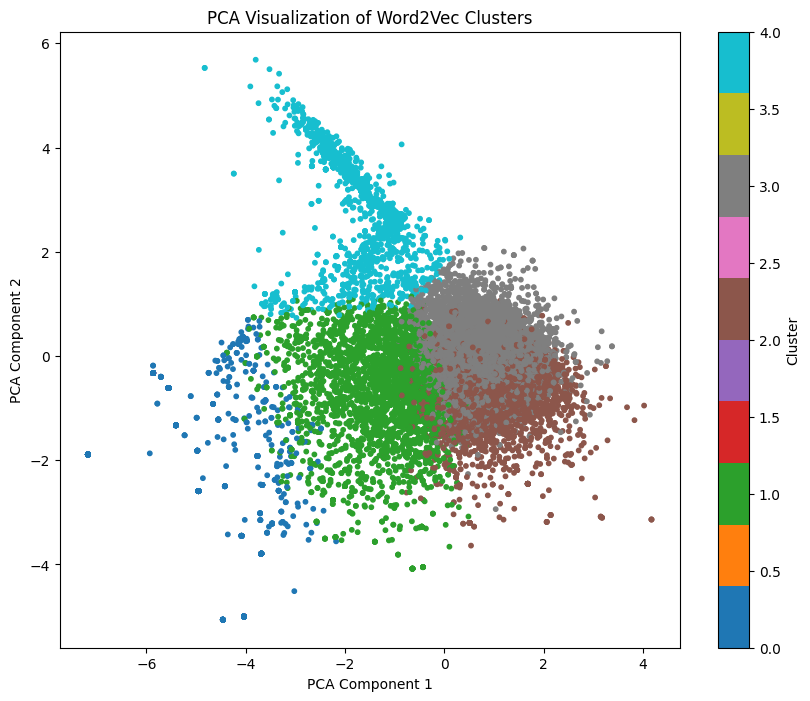

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA for visualization
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_embeddings)

# Plot the clusters in 2D
plt.figure(figsize=(10, 8))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='tab10', s=10)
plt.title("PCA Visualization of Word2Vec Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()


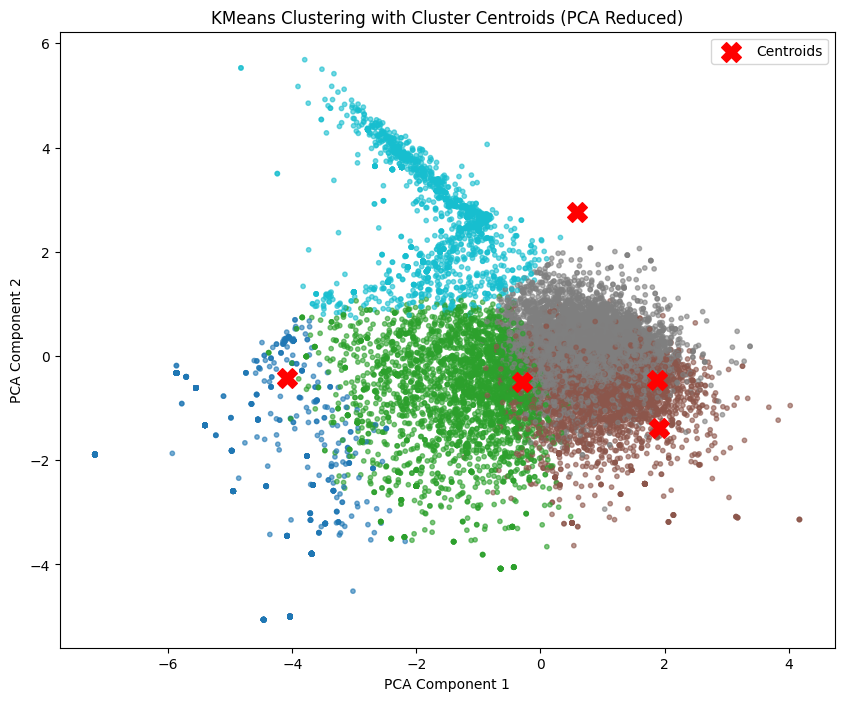

In [ ]:
# Reduce cluster centers to 2D using PCA
cluster_centers_2d = PCA(n_components=2).fit_transform(kmeans.cluster_centers_)

# Plot cluster centers
plt.figure(figsize=(10, 8))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='tab10', s=10, alpha=0.6)
plt.scatter(cluster_centers_2d[:, 0], cluster_centers_2d[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title("KMeans Clustering with Cluster Centroids (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()


### BERT

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Check for CUDA availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load a pre-trained BERT model and tokenizer
model_name = 'sentence-transformers/all-MiniLM-L6-v2'  # Optimized for embeddings
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name).to(device)

# Function to generate sentence embeddings using BERT
def generate_bert_embeddings(texts, tokenizer, model, device):
    embeddings = []
    for text in texts:
        # Tokenize and encode
        tokens = tokenizer(text, padding=True, truncation=True, max_length=128, return_tensors="pt").to(device)
        with torch.no_grad():
            # Pass tokens through BERT
            outputs = model(**tokens)
            # Mean pooling over the token embeddings
            sentence_embedding = outputs.last_hidden_state.mean(dim=1).squeeze()
            embeddings.append(sentence_embedding.cpu().numpy())
    return np.array(embeddings)

# Generate BERT embeddings for dataset
texts = data['Reviews']
X_embeddings = generate_bert_embeddings(texts, tokenizer, model, device)

# Apply KMeans clustering
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(X_embeddings)

# Add cluster labels to the dataset
data['Cluster'] = labels

# Evaluate clustering with silhouette score
sil_score = silhouette_score(X_embeddings, labels)
print(f"Silhouette Score for BERT Clustering: {sil_score:.4f}")


# Extract top keywords for each cluster
def get_top_keywords_per_cluster(kmeans_model, embeddings, n_keywords=10):
    clusters = {}
    for cluster_num in range(kmeans_model.n_clusters):
        cluster_indices = np.where(kmeans_model.labels_ == cluster_num)[0]
        cluster_embeddings = embeddings[cluster_indices]
        cluster_mean = cluster_embeddings.mean(axis=0)  # Compute mean embedding for the cluster
        clusters[cluster_num] = f"Cluster {cluster_num} has a center near: {cluster_mean[:5]}"
    return clusters

top_keywords = get_top_keywords_per_cluster(kmeans, X_embeddings)
print("\nTop Keywords for Each Cluster:")
for cluster, description in top_keywords.items():
    print(f"{description}")

# Print sample reviews for each cluster
print("\nSample Reviews for Each Cluster:")
for cluster in range(optimal_k):
    print(f"\nCluster {cluster}:")
    cluster_reviews = data[data['Cluster'] == cluster]['Reviews']
    if len(cluster_reviews) < 3:  # Handle clusters with fewer than 3 reviews
        print("- Not enough reviews to sample.")
    else:
        sample_reviews = cluster_reviews.sample(3, random_state=42)  # Sample 3 reviews per cluster
        for review in sample_reviews:
            print(f"- {review}")


Using device: cuda


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Silhouette Score for BERT Clustering: 0.1669

Top Keywords for Each Cluster:
Cluster 0 has a center near: [-0.2904172   0.15851034  0.02157937 -0.05507648 -0.060664  ]
Cluster 1 has a center near: [-0.53297156  0.34080163  0.33011556 -0.25033346 -0.31371802]
Cluster 2 has a center near: [-0.42468584 -0.04093118 -0.20989029  0.10871045  0.12565286]
Cluster 3 has a center near: [-0.17272282  0.04882389  0.18616854 -0.09677979 -0.05450128]
Cluster 4 has a center near: [-0.25605196  0.2850941  -0.12366488 -0.19035031 -0.47709173]

Sample Reviews for Each Cluster:

Cluster 0:
- Excellent thanks
- Evrything as describes! Great Productos and service!
- Everything was what I expected. Thank you

Cluster 1:
- I love it bigger than my iPhone 5
- very happy with this phone
- It is great phone and good delivery. Thank you

Cluster 2:
- good
- working good
- Horrible

Cluster 3:
- needed to take it to a celular lab, spent some more money on it in order to reboot it's opearting system. still haven't

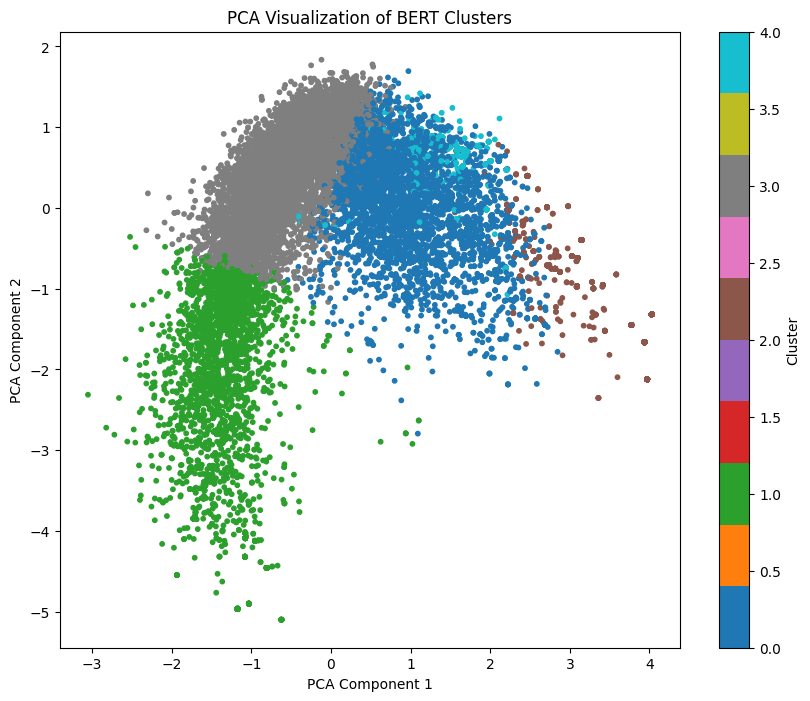

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA for visualization
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_embeddings)

# Plot the clusters in 2D
plt.figure(figsize=(10, 8))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='tab10', s=10)
plt.title("PCA Visualization of BERT Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()


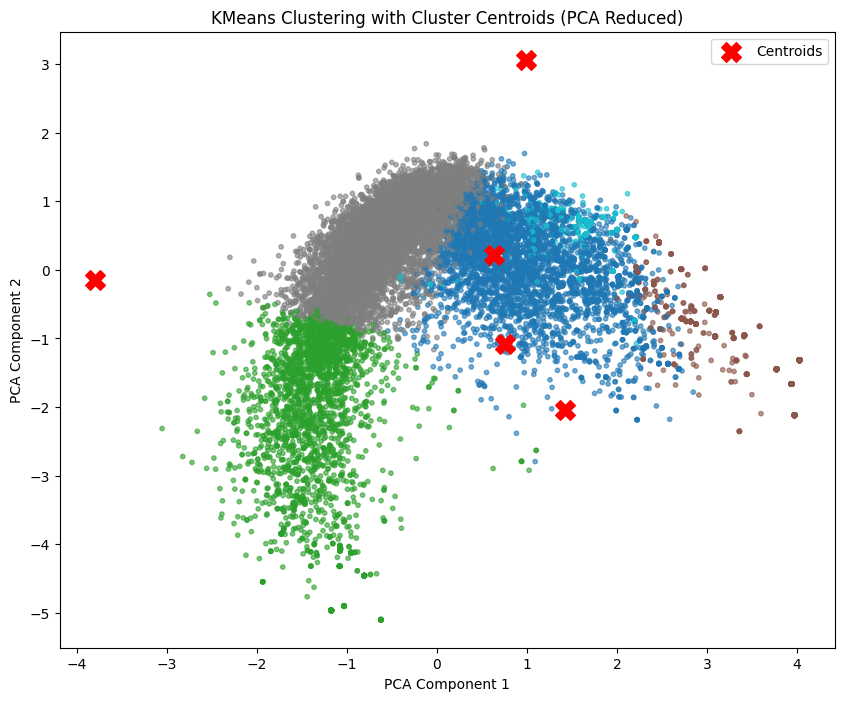

In [ ]:
# Reduce cluster centers to 2D using PCA
cluster_centers_2d = PCA(n_components=2).fit_transform(kmeans.cluster_centers_)

# Plot cluster centers
plt.figure(figsize=(10, 8))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='tab10', s=10, alpha=0.6)
plt.scatter(cluster_centers_2d[:, 0], cluster_centers_2d[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title("KMeans Clustering with Cluster Centroids (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

It can be observed from the K-Means elbow plot that the elbow points occur at K=4 and K=8. Hence, we proceeded with K=4 clusters. Since we used TF-IDF vectors for the sentences, the vectors were not well-separated and formed a star-like structure. This indicates that the vector space was not sufficiently representative, which caused Agglomerative Clustering and DBSCAN to fail in clustering them effectively.

Additionally, Hierarchical Clustering (Agglomerative) required significant computational time due to its tree structure. To manage this, we limited the number of data points to 2000.

When we switched to Word2Vec embeddings, we observed superior results and better clustering since Word2Vec captures the contextual embeddings of sentences rather than relying solely on term frequency, as in TF-IDF. Furthermore, we noticed even better results with BERT embeddings, which achieved lower Silhouette scores, indicating more well-defined clusters. BERT's superiority can be attributed to its extensive pretraining on large corpora and its ability to produce highly contextualized sentence embeddings, resulting in improved cluster separation and projection in the embedding space.



# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Sorting dispersed words into coherent groups made this clustering assignment feel like solving a riddle. Every algorithm presented distinct viewpoints on the same data, much like a different lens. Every technique contributed something useful, from the structured approach of K-Means to the noise-embracing capabilities of DBSCAN.Preparing Data: The results were more meaningful once the text was cleaned and vectorised, which was similar to preparing a canvas for art.
Word2Vec with K-Means: These were slick and perceptive. It was quite satisfying to see Word2Vec produce embeddings and observe clusters form. I learnt
BERT: A formidable force! This age-old problem was given a contemporary twist by using pre-trained embeddings.
Challenges
DBSCAN: It's a little particular! It was like going on a treasure hunt to find the correct eps and min_samples.
Hierarchical Clustering: Making dendrograms was enjoyable, but with bigger datasets, it became daunting.
Dimensionality: Although it required more work, visualising high-dimensional embeddings was worthwhile.
This exercise reaffirmed how crucial it is to comprehend the characteristics of your data before selecting a clustering algorithm. Additionally, it emphasised how the clustering result is greatly impacted by text representation (TF-IDF, Word2Vec, and BERT).

This exercise, which combined creativity and critical thinking, was essentially like exploring a text-mining playground. An excellent advancement in text clustering skills.

'''

"\nSorting dispersed words into coherent groups made this clustering assignment feel like solving a riddle. Every algorithm presented distinct viewpoints on the same data, much like a different lens. Every technique contributed something useful, from the structured approach of K-Means to the noise-embracing capabilities of DBSCAN.Preparing Data: The results were more meaningful once the text was cleaned and vectorised, which was similar to preparing a canvas for art.\nWord2Vec with K-Means: These were slick and perceptive. It was quite satisfying to see Word2Vec produce embeddings and observe clusters form. I learnt\nBERT: A formidable force! This age-old problem was given a contemporary twist by using pre-trained embeddings.\nChallengesDBSCAN: It's a little particular! It was like going on a treasure hunt to find the correct eps and min_samples.\nHierarchical Clustering: Making dendrograms was enjoyable, but with bigger datasets, it became daunting.\nDimensionality: Although it requir